In [1]:
import numpy as np 
import matplotlib.pyplot as plt

***EXERCISE 1 NEURAL NETWORKS***

In [2]:
class SingleLayerNN:
    def __init__(self, input_dim, seed=42):
        np.random.seed(seed)
        self.input_dim = input_dim
        self.weights = np.random.randn(input_dim)
        self.bias = np.random.randn(1)

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def sigmoid_der(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def f_propagation(self, inputs, validation=False):
        if validation == True:
            z = np.dot(inputs, self.weights) + self.bias
        else:
            z = np.dot(inputs, self.weights) + self.bias
        return self.sigmoid(z)
    
    def loss(self, predictions, targets):
        eps = 1e-15
        predictions = np.maximum(eps, np.minimum(1-eps, predictions))
        loss = np.linalg.norm(-(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions)))
        return loss
    
    def b_propagation(self, inputs, predictions, targets, learning_rate):
        delta_w = learning_rate * np.dot(inputs.T, (targets - predictions))
        delta_b = np.mean(learning_rate * (targets - predictions))
        return delta_w, delta_b

    def update_weights_and_biases(self, delta_w, delta_b):
        self.weights = self.weights + delta_w
        self.bias = self.bias + delta_b

    def train(self, inputs, targets, validation_data_inputs, validation_data_targets, epochs=1000, learning_rate=0.01, showIterations = True):
        for i in range(epochs):
            #training
            predictions = self.f_propagation(inputs)
            
            loss = self.loss(predictions, targets)
            delta_w, delta_b = self.b_propagation(inputs, predictions, targets, learning_rate)
            self.update_weights_and_biases(delta_w, delta_b)

            #validation
            val_predictions = self.f_propagation(validation_data_inputs, validation=True)
            val_loss = self.loss(val_predictions, validation_data_targets)
            
            if showIterations == True:
                print('Iteration: '+str(i)+', Loss:'+str(loss)+', Validation Loss:'+str(val_loss))
            
    def predict(self, x):
        predictions = self.f_propagation(x)
        return predictions
    
    def plot_decision_boundary(self, inputs, targets, title):
        x_min , x_max = inputs[:, 0]. min() - 1, inputs[:, 0]. max() + 1
        x_values = np.linspace(x_min , x_max , 200)
        
        y_values = ((-self.weights[0] / self.weights[1]) * x_values) - (self.bias / self.weights[1])

        plt.figure(figsize=(8, 6))
        plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, s=20)
        
        plt.plot(x_values, y_values, label='Decision Boundary')
        plt.xlim(x_min, x_max)
        plt.ylim(inputs[:, 1]. min() - 1, inputs[:, 1]. max() + 1)
        plt.title(title)
        plt.grid(True)
        plt.show()  

In [3]:
#create synthetic dataset
n_samples = 100
features_class_0 = np.random.randn(n_samples, 2) + [2, -2] # Class 0
features_class_1 = np.random.randn(n_samples, 2) + [-2, 2] # Class 1
inputs = np.vstack((features_class_0, features_class_1))
targets = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

#standardize the features
inputs = (inputs - np.mean(inputs, axis=0)) / np.std(inputs, axis=0)

#create validation data
n_samples_val = 100
features_class_0_val = np.random.randn(n_samples_val, 2) + [2, -2]  # Class 0
features_class_1_val = np.random.randn(n_samples_val, 2) + [-2, 2]  # Class 1
inputs_val = np.vstack((features_class_0_val, features_class_1_val))
targets_val = np.hstack((np.zeros(n_samples_val), np.ones(n_samples_val)))

# Standardize the validation features
inputs_val = (inputs_val - np.mean(inputs_val, axis=0)) / np.std(inputs_val, axis=0)


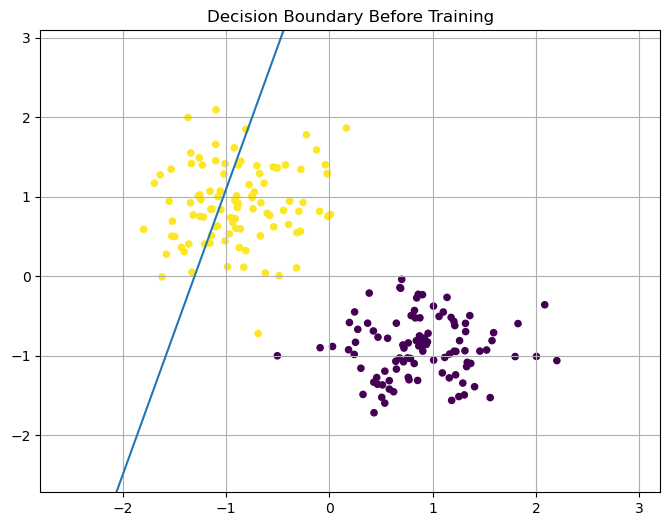

In [4]:
model = SingleLayerNN(input_dim=2)
model.plot_decision_boundary(inputs, targets, title='Decision Boundary Before Training')

Iteration: 0, Loss:16.340061021882473, Validation Loss:2.6001173774574964e-08
Iteration: 1, Loss:1.8653307801816332, Validation Loss:2.146295808576764e-08
Iteration: 2, Loss:1.2093691833762221, Validation Loss:1.8303509875398968e-08
Iteration: 3, Loss:0.774143950540305, Validation Loss:1.619634817167616e-08
Iteration: 4, Loss:0.5206713178396932, Validation Loss:1.4771050047843026e-08
Iteration: 5, Loss:0.3756372429002975, Validation Loss:1.3757693523572806e-08
Iteration: 6, Loss:0.28797126576650156, Validation Loss:1.2998187721820486e-08
Iteration: 7, Loss:0.2311748682175233, Validation Loss:1.240334698203944e-08
Iteration: 8, Loss:0.19205312906562197, Validation Loss:1.1921085634202465e-08
Iteration: 9, Loss:0.16373448608440114, Validation Loss:1.151938140405575e-08


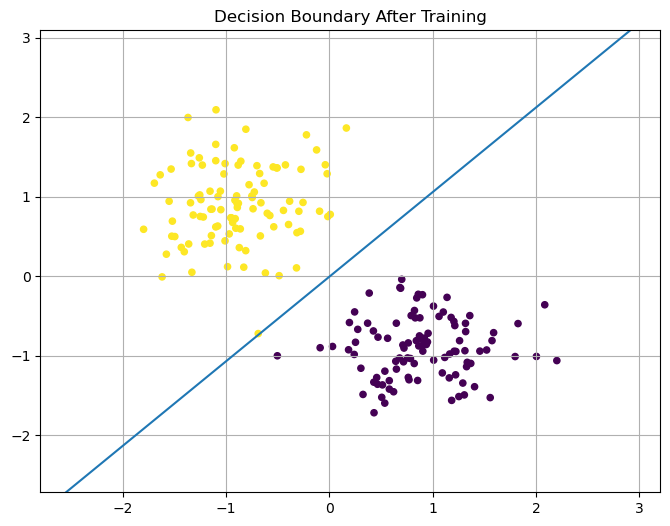

In [18]:
model_trained = SingleLayerNN(input_dim=2)
model_trained.train(inputs, targets, inputs_val, targets_val, epochs=10, learning_rate=1)
model_trained.plot_decision_boundary(inputs, targets, title='Decision Boundary After Training')

***DISCUSSION IMPLEMENTATION AND RESULTS***  
- Before and after training, a visual examination of decision boundaries reveals significant disparities. The plot titled "Decision Boundary Before Training" illustrates the inability of non-updated weights and biases to delineate a coherent decision boundary. Conversely, the plot labeled "Decision Boundary After Training" demonstrates the model's attainment of a discernible decision boundary subsequent to weight and bias updates.
- Furthermore, the selection of an optimal learning rate involved an iterative process, wherein various options were tested, and validation loss calculations were scrutinized. The learning rate plays a pivotal role in determining the speed and stability of convergence during training. Higher learning rates may lead to faster convergence but risk overshooting the optimal solution, while lower learning rates may necessitate longer training times but offer more stable convergence. Through this experimentation, it was determined that iteration 9 at a learning rate of 1, yielded the most satisfactory outcomes in terms of model performance.
- The single-layer, single-neuron perceptron is effective for linearly separable datasets but struggles with non-linearly separable ones due to its linear decision boundary. This limitation arises from its inability to capture complex patterns, necessitating alternative models or feature representations for non-linearly separable datasets.

***EXERCISE 2 BACKPROPAGATION***

![title](computational_graph.jpg)

***References***
- Chat GPT version 3.5 was used as a writing assistance tool.